In [1]:
import numpy as np
import pandas as pd
import itertools as it
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pylab as plt

In [2]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')
Y = Data['Class']
X = Data.drop('Class', axis = 1)

### Parameters

In [3]:
step = 10
ts_prop = 0.1
va_prop = 0.2

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://www.oreilly.com/library/view/machine-learning-with/9781789343700/e3b1b1fd-ddff-435e-aff8-44eb01608b91.xhtml

In [13]:
Hpyer_Parameters = [[i for i in range(1,30)], # max_depth
                    [i for i in range(1,4)]] # min_samples_leaf
set_parameters = [i for i in it.product(*Hpyer_Parameters)]
k = 5

Epsilon = 0.15
delta = 0.15

n_est = int(np.ceil((1/Epsilon)*(np.log(len(set_parameters)) + np.log(1/delta))))
n_opt = (np.log(2)/(2*Epsilon**2))*((2**k - 1)*(1 + np.log2(X.shape[1])) + 1 + np.log(delta**(-1)))

In [6]:
n_est

58

In [14]:
n_opt

116143895919.01358

# REVISAR ESTO DE ARRIBA

### $\eta$ minimo estimado

##### Model exploration

In [5]:
X1, X1_ts, Y1, Y1_ts = train_test_split(X, Y, train_size = 1-ts_prop, random_state=19)
X1_tr, X1_va, Y1_tr, Y1_va = train_test_split(X1, Y1, train_size = n_est/X1.shape[0], random_state=19)

N = range(n_est, round(X1.shape[0]*(1-va_prop)), step)

In [6]:
n_est_mod_results = {
    'Model': [None for i in range(len(set_parameters))],
    'Acc_Test': np.zeros(len(set_parameters)),
    'Acc_Val': np.zeros(len(set_parameters)),
    'Conf_Mat': np.zeros((len(set_parameters),3,3))
}
n_est_effect = {
    'Accuracy': np.zeros(len(N)),
    'Conf_Mat': np.zeros((len(N),3,3))
}

In [7]:
for i in range(len(set_parameters)):
    dtc = DecisionTreeClassifier(max_depth = set_parameters[i][0], min_samples_leaf= set_parameters[i][1], random_state=19)
    dtc.fit(X1_tr, Y1_tr)
    y_pred = dtc.predict(X1_va)
    n_est_mod_results['Model'][i] = dtc
    n_est_mod_results['Acc_Val'][i] = accuracy_score(Y1_va, y_pred)
    n_est_mod_results['Conf_Mat'][i,:,:] = confusion_matrix(Y1_va, y_pred)
    
ind_bst = np.where(n_est_mod_results['Acc_Val'] == np.amax(n_est_mod_results['Acc_Val']))[0][0]
n_est_mod_results['Best'] = set_parameters[ind_bst]

##### Accuracy vs traning size

In [8]:
best_dtc = DecisionTreeClassifier(max_depth = set_parameters[ind_bst][0],
                                  min_samples_leaf= set_parameters[ind_bst][1], random_state=19)
for i in range(len(N)):
    Xi_tr, Xi_va, Yi_tr, Yi_va = train_test_split(X1, Y1, train_size = N[i]/X1.shape[0], random_state=19)
    best_dtc.fit(Xi_tr, Yi_tr)
    y_pred = dtc.predict(Xi_va)
    n_est_effect['Accuracy'][i] = accuracy_score(Yi_va, y_pred)
    n_est_effect['Conf_Mat'][i,:,:] = confusion_matrix(Yi_va, y_pred)

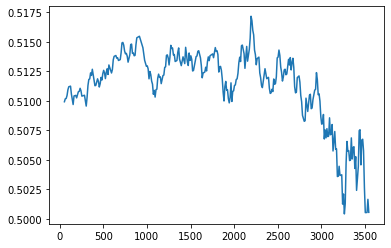

In [9]:
plt.plot(N,n_est_effect['Accuracy'])

### $\eta$ minimo optimo

In [10]:
X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, Y, train_size = n_est/X.shape[0], random_state=19)
X2_va, X2_ts, Y2_va, Y2_ts = train_test_split(X2_ts, Y2_ts, train_size = 0.5, random_state=19)

N_opt = range(n_opt, round(X1.shape[0]*(1-va_prop)), step)

In [11]:
n_opt_mod_results = {
    'Model': [None for i in range(len(set_parameters))],
    'Acc_Test': np.zeros(len(set_parameters)),
    'Acc_Val': np.zeros(len(set_parameters)),
    'Conf_Mat': np.zeros((len(set_parameters),3,3))
}
n_opt_effect = {
    'Accuracy': np.zeros(len(N_opt)),
    'Conf_Mat': np.zeros((len(N_opt),3,3))
}

In [12]:
for i in range(len(set_parameters)):
    dtc = DecisionTreeClassifier(max_depth = set_parameters[i][0], min_samples_leaf= set_parameters[i][1], random_state=19)
    dtc.fit(X2_tr, Y2_tr)
    y_pred = dtc.predict(X2_va)
    n_opt_mod_results['Model'][i] = dtc
    n_opt_mod_results['Acc_Val'][i] = accuracy_score(Y2_va, y_pred)
    n_opt_mod_results['Conf_Mat'][i,:,:] = confusion_matrix(Y2_va, y_pred)
    
ind_bst = np.where(n_opt_mod_results['Acc_Val'] == np.amax(n_opt_mod_results['Acc_Val']))[0][0]
n_opt_mod_results['Best'] = set_parameters[ind_bst]

##### Accuracy vs traning size

In [13]:
best_dtc = DecisionTreeClassifier(max_depth = set_parameters[ind_bst][0],
                                  min_samples_leaf= set_parameters[ind_bst][1], random_state=19)
for i in range(len(N_opt)):
    Xi_tr, Xi_va, Yi_tr, Yi_va = train_test_split(X1, Y1, train_size = N[i]/X1.shape[0], random_state=19)
    best_dtc.fit(Xi_tr, Yi_tr)
    y_pred = dtc.predict(Xi_va)
    n_opt_effect['Accuracy'][i] = accuracy_score(Yi_va, y_pred)
    n_opt_effect['Conf_Mat'][i,:,:] = confusion_matrix(Yi_va, y_pred)

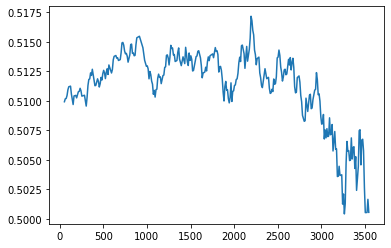

In [14]:
plt.plot(N,n_opt_effect['Accuracy'])